<a href="https://colab.research.google.com/github/sabina-sabi/Covid19Data/blob/main/Covid19Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
fichier_excel = 'dataset.xlsx'
# Charger le fichier Excel dans un DataFrame
df = pd.read_excel(fichier_excel)
# Définir l'affichage pour afficher toutes les colonnes sur une seule ligne
pd.set_option("display.max_columns", None)
# Afficher le DataFrame
print(df.head().to_string(index=False))

     Patient ID  Patient age quantile SARS-Cov-2 exam result  Patient addmited to regular ward (1=yes, 0=no)  Patient addmited to semi-intensive unit (1=yes, 0=no)  Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  Mean corpuscular volume (MCV)  Monocytes  Red blood cell distribution width (RDW)  Serum Glucose Respiratory Syncytial Virus  Influenza A  Influenza B Parainfluenza 1 CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae Coronavirus HKU1 Parainfluenza 3 Chlamydophila pneumoniae   Adenovirus Parainfluenza 4 Coronavirus229E CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus Parainfluenza 2  Neutrophils     Urea  Proteina C reativa mg/dL  Creatinine  Potassium   Sodium Influenza B, rapid test Influenza A, rapid test  Alanine transaminase  Asp

In [3]:
# Informations sur les colonnes
df.info()

# Statistiques descriptives
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,0.0,7.000000e+01,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439583e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215406e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,0.0,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373771e-09,8.602732e-09,1.382582e-08,0.0,-2.554485e-09,NaN,7.557017e-09,NaN,-9.824941e-10,-4.733640e-09,1.733551e-09,NaN,-1.986821e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,NaN,-5.731216e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.001262e+00,1.000990e+00,1.001181e+00,1.001350e+00,1.001354e+00,1.002230e+00,1.002220e+00,1.003284e+00,1.002759e+00,1.002759e+00,1.002759e+00,1.003490e+00,1.010153e+00,1.012739e+00,1.003697e+00,1.003697e+00,1.0036

<Axes: >

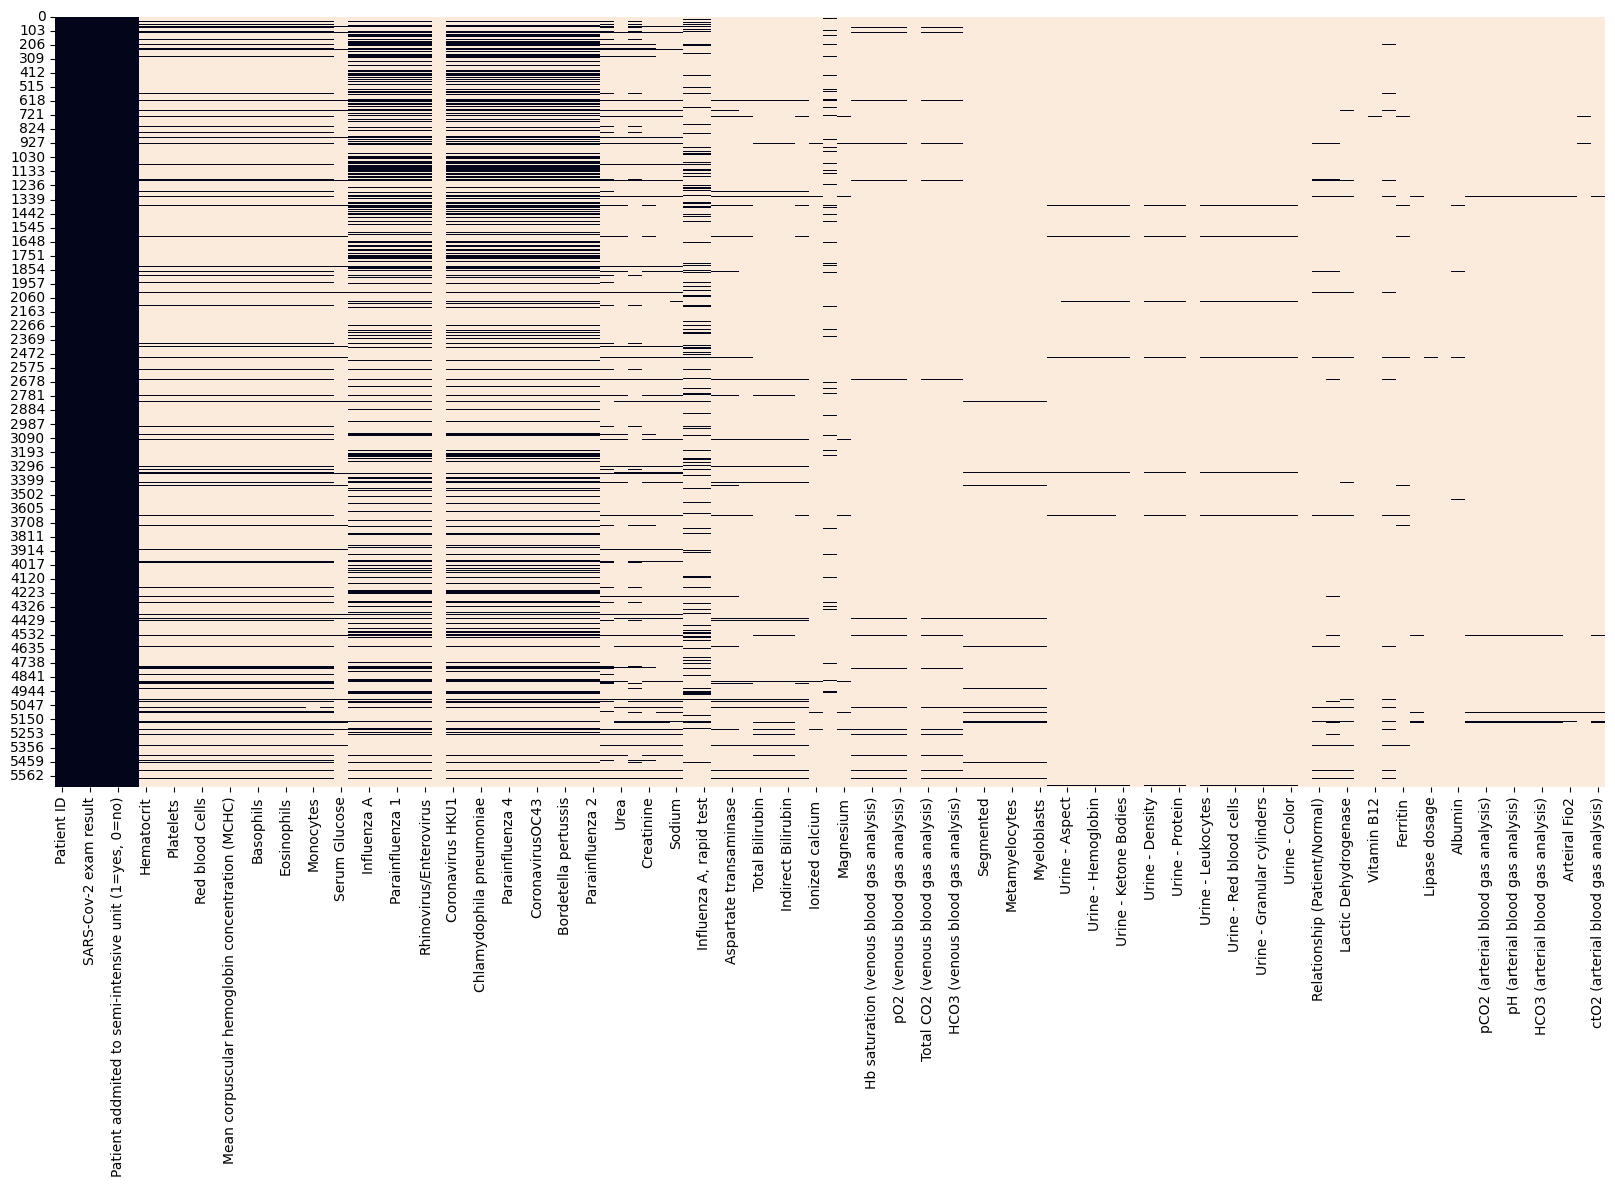

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [5]:
#afficher les pourcentages pour voir les données qu'on va supprimer 
missing=(df.isna().sum()/df.shape[0]).sort_values(ascending=True)
pd.set_option('display.max_rows', None)
print(missing)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [6]:
# Exporter le DataFrame dans un fichier CSV
df.to_csv('dataframe.csv', index=False)  

In [7]:

doublons = df[df.duplicated(keep=False)]
if not doublons.empty:
    print("Lignes dupliquées trouvées:")
    print(doublons.to_string(index=False))
else:
    print("Aucune ligne dupliquée trouvée.")
nombre_doublons = doublons.shape[0]
print(f"Nombre de lignes dupliquées: {nombre_doublons}")

Aucune ligne dupliquée trouvée.
Nombre de lignes dupliquées: 0


In [8]:
df['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

In [9]:
df=df.drop('Patient ID', axis=1)

In [10]:
for col in df.select_dtypes('float'):
    print(col)

Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)
Serum Glucose
Mycoplasma pneumoniae
Neutrophils
Urea
Proteina C reativa mg/dL
Creatinine
Potassium
Sodium
Alanine transaminase
Aspartate transaminase
Gamma-glutamyltransferase 
Total Bilirubin
Direct Bilirubin
Indirect Bilirubin
Alkaline phosphatase
Ionized calcium 
Magnesium
pCO2 (venous blood gas analysis)
Hb saturation (venous blood gas analysis)
Base excess (venous blood gas analysis)
pO2 (venous blood gas analysis)
Fio2 (venous blood gas analysis)
Total CO2 (venous blood gas analysis)
pH (venous blood gas analysis)
HCO3 (venous blood gas analysis)
Rods #
Segmented
Promyelocytes
Metamyelocytes
Myelocytes
Myeloblasts
Urine - Density
Urine - Sugar
Urine - Red blood cells
Partial thromboplastin time (PTT) 
Relat

In [39]:
for col in df.select_dtypes('object'):
    print(f'{col :<50} {df[col].unique()}')


SARS-Cov-2 exam result                             ['negative' 'positive']
Respiratory Syncytial Virus                        [nan 'not_detected' 'detected']
Influenza A                                        [nan 'not_detected' 'detected']
Influenza B                                        [nan 'not_detected' 'detected']
Parainfluenza 1                                    [nan 'not_detected' 'detected']
CoronavirusNL63                                    [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus                             [nan 'detected' 'not_detected']
Coronavirus HKU1                                   [nan 'not_detected' 'detected']
Parainfluenza 3                                    [nan 'not_detected' 'detected']
Chlamydophila pneumoniae                           [nan 'not_detected' 'detected']
Adenovirus                                         [nan 'not_detected' 'detected']
Parainfluenza 4                                    [nan 'not_detected' 'detected']
Coronavirus2

C:\Users\sonia\AppData\Local\Temp\ipykernel_29452\2413286044.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


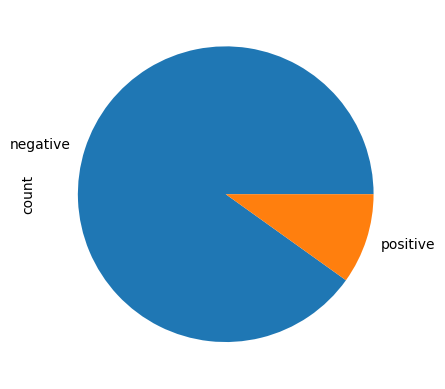

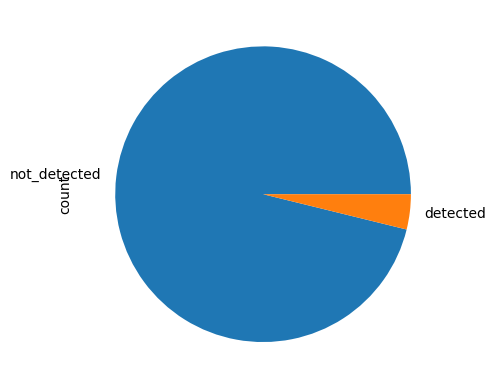

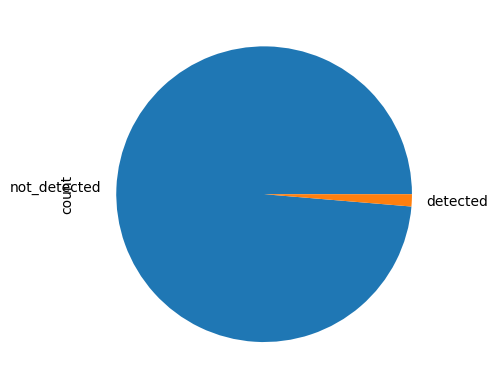

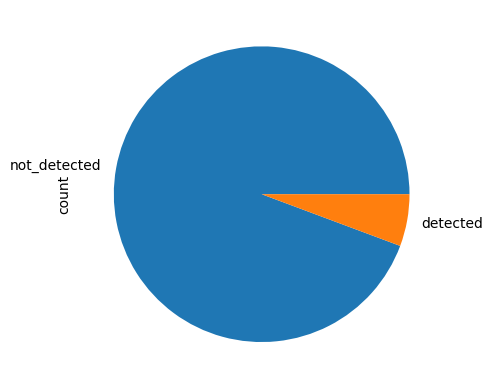

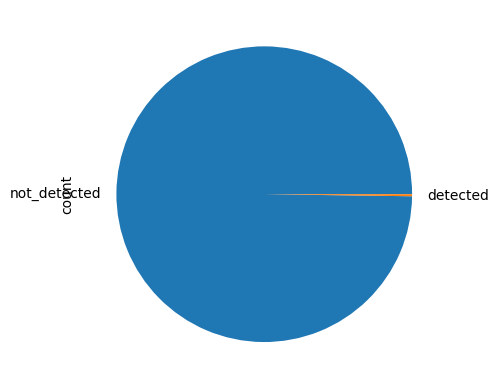

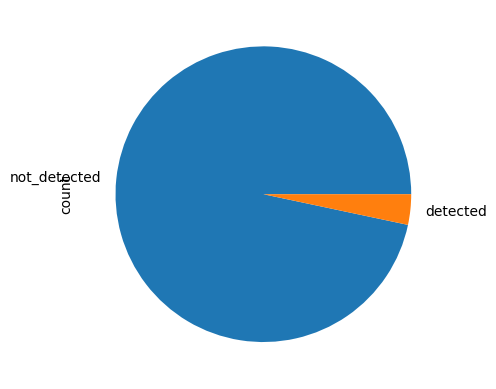

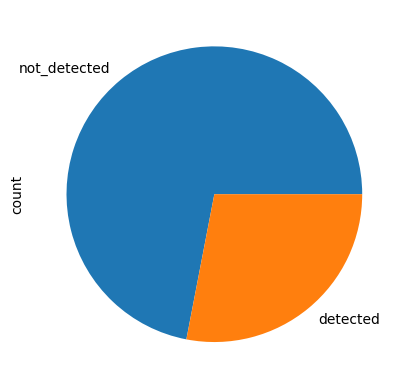

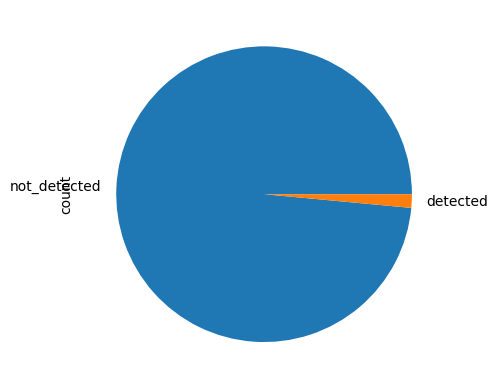

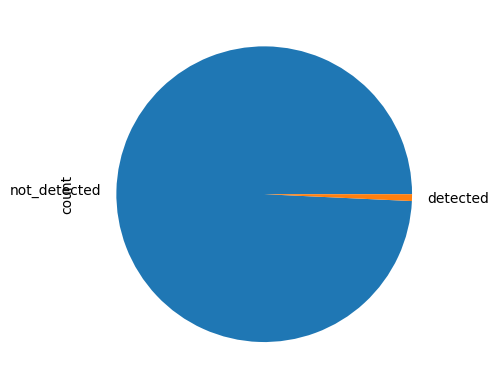

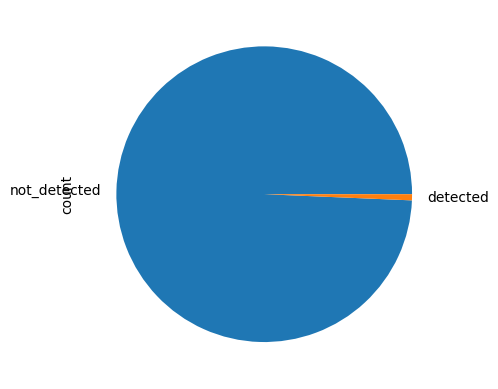

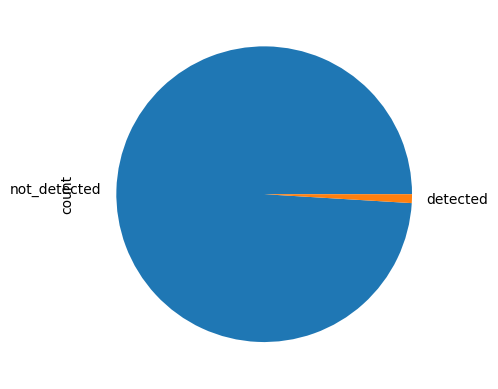

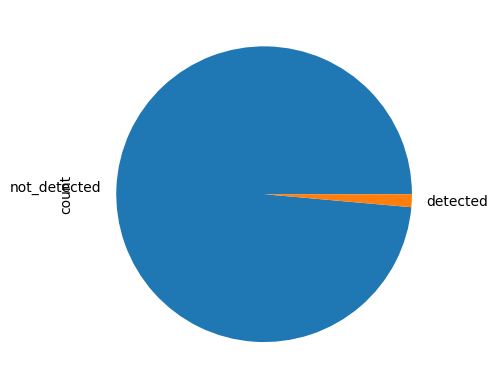

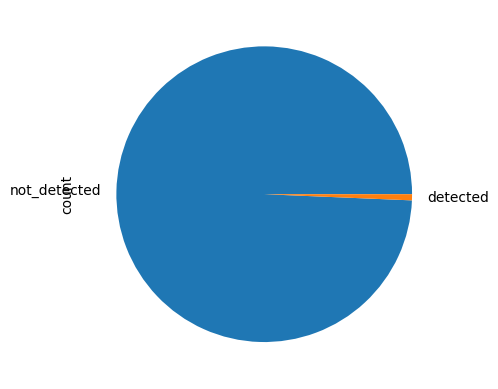

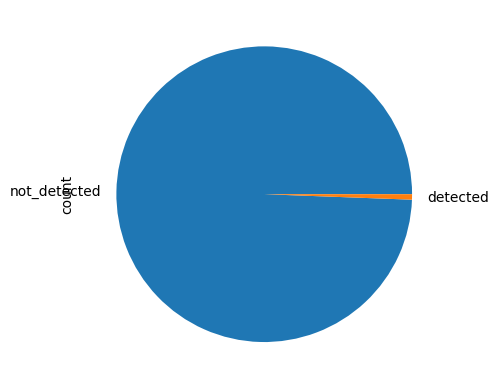

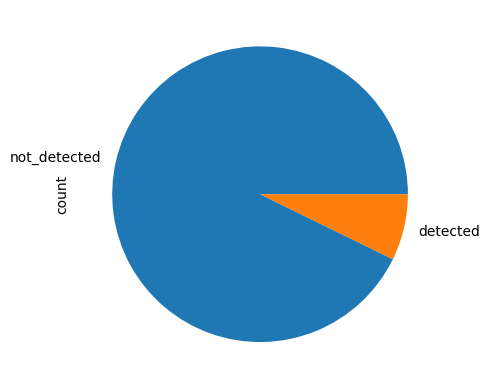

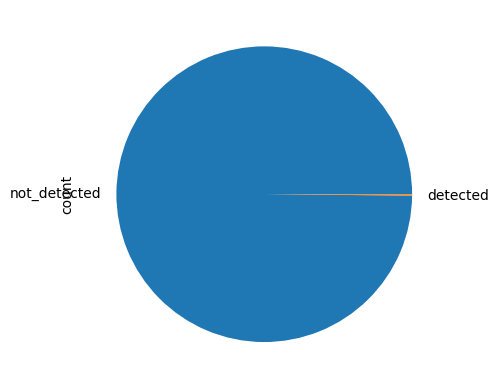

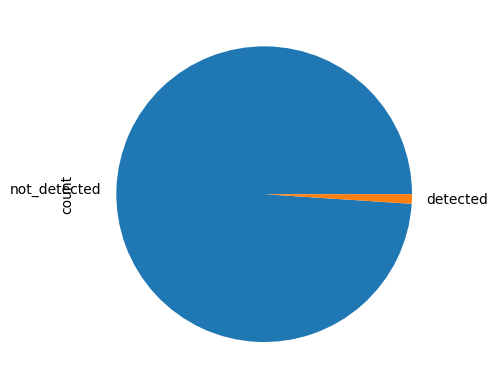

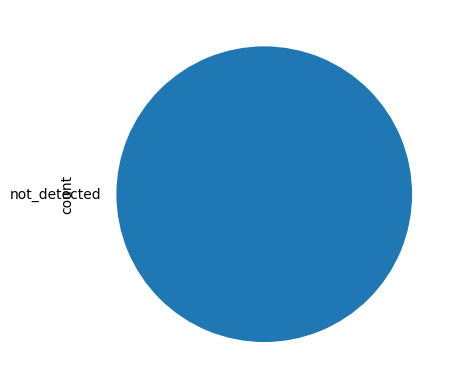

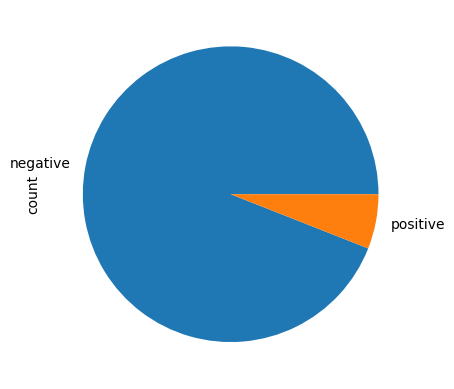

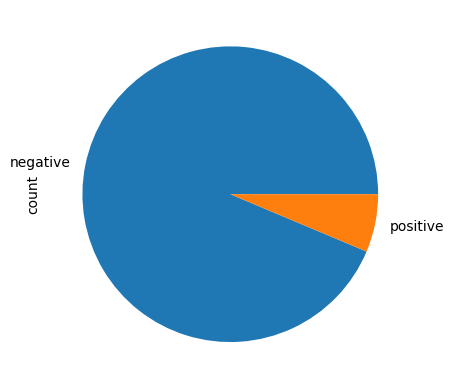

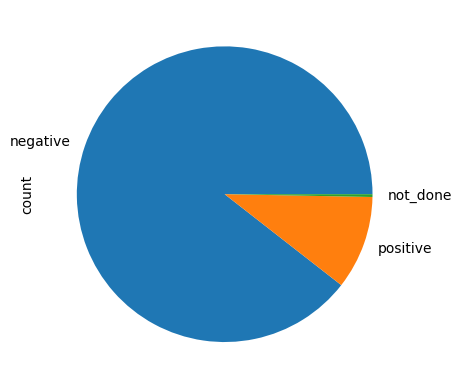

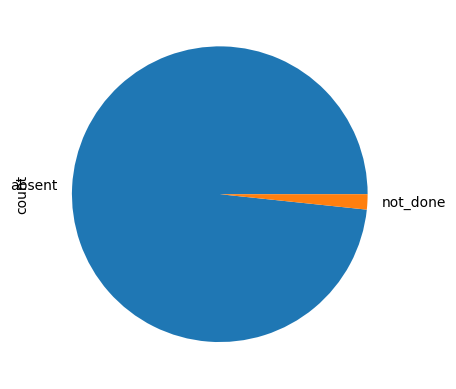

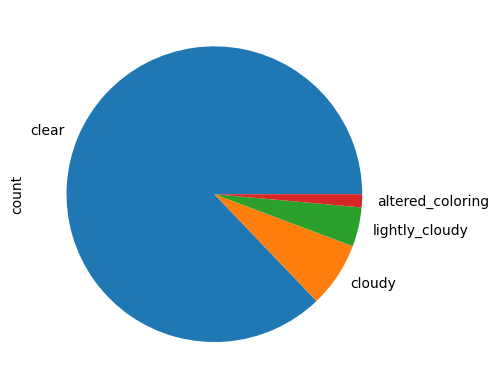

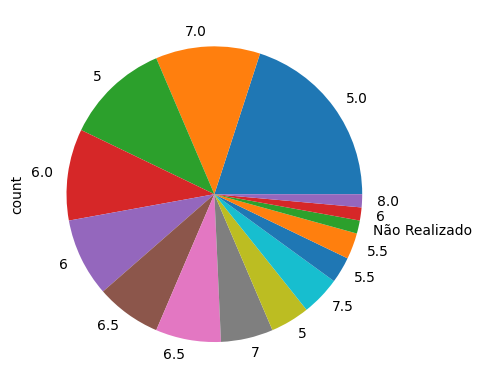

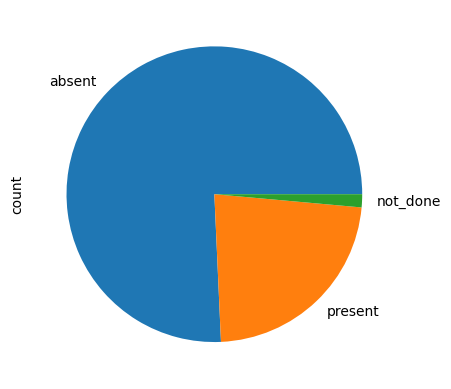

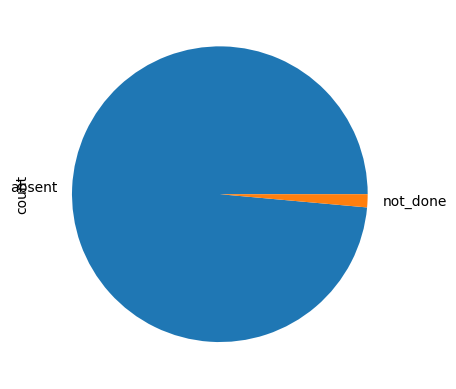

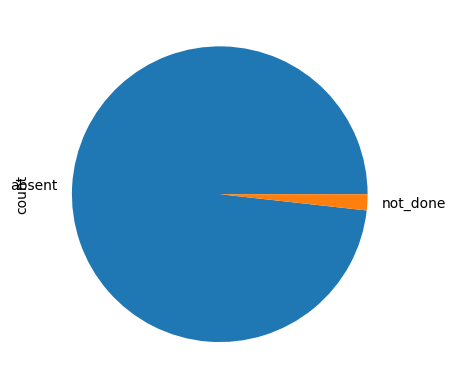

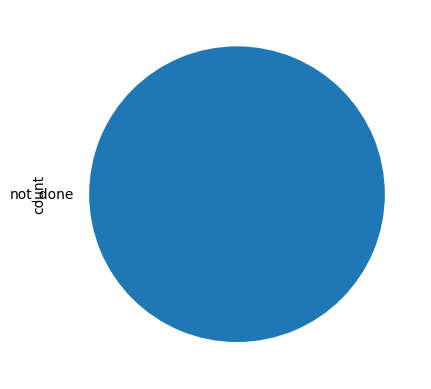

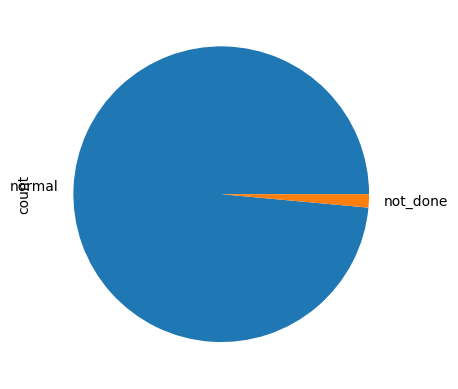

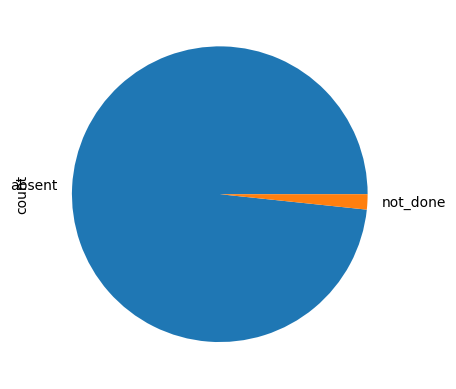

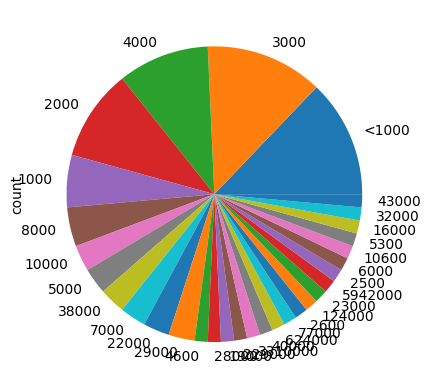

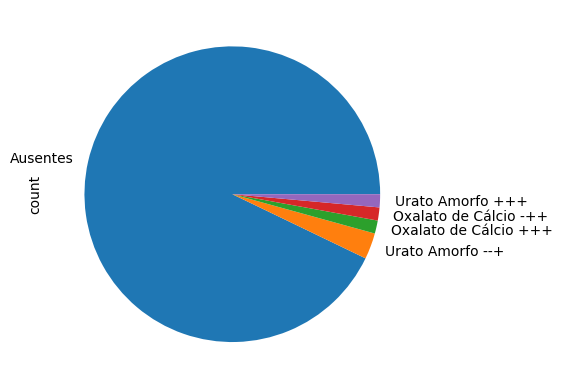

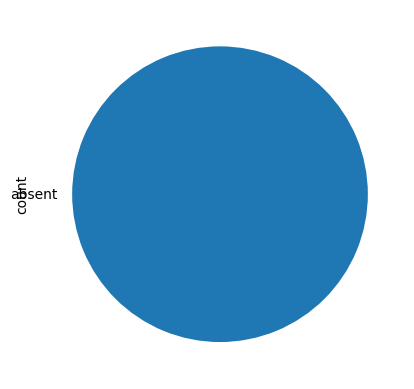

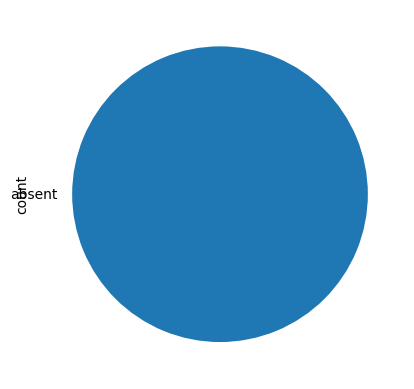

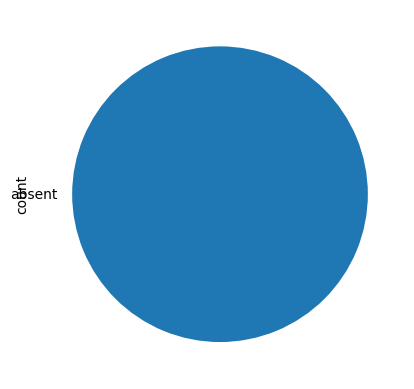

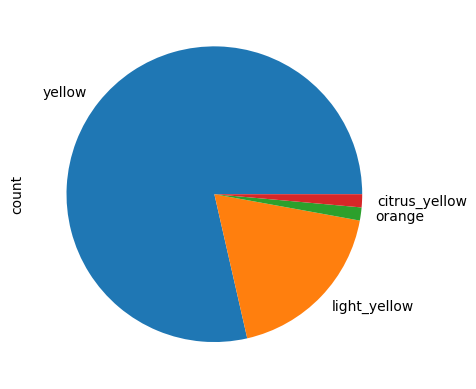

In [40]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

Colonnes des tests sanguins: Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')
Colonnes des tests viraux: Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')


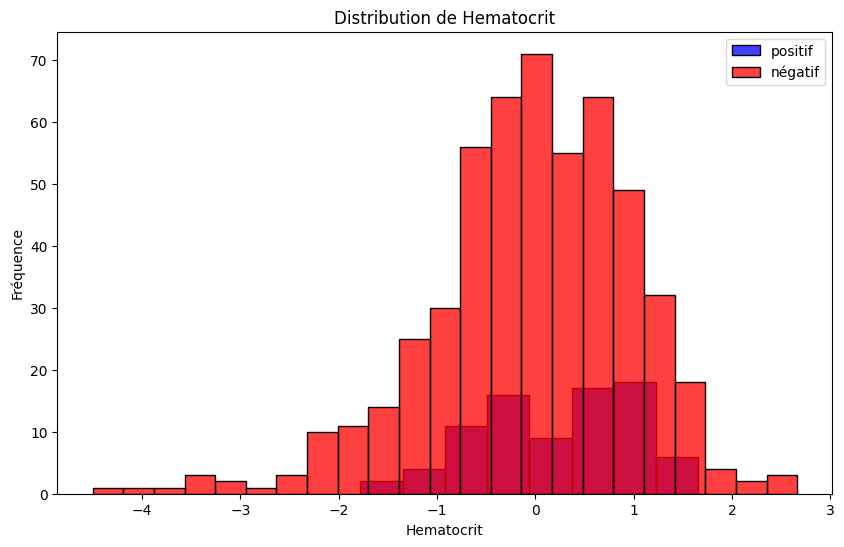

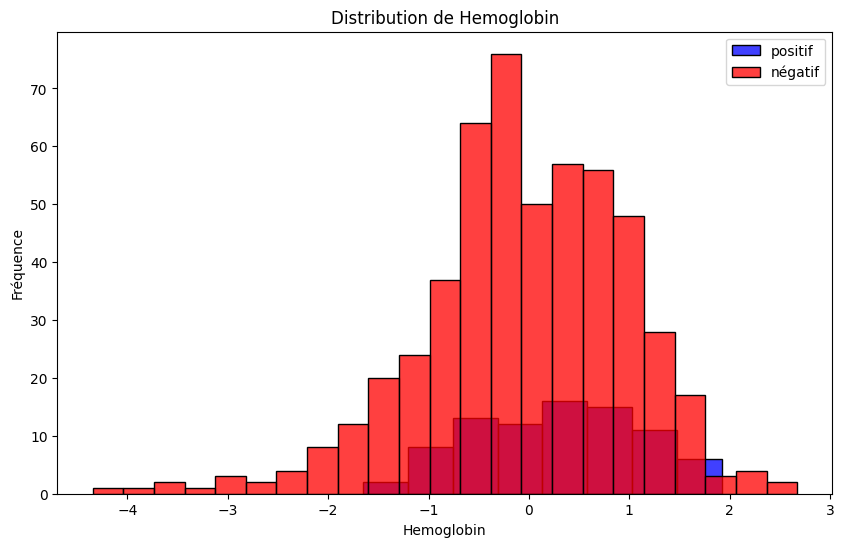

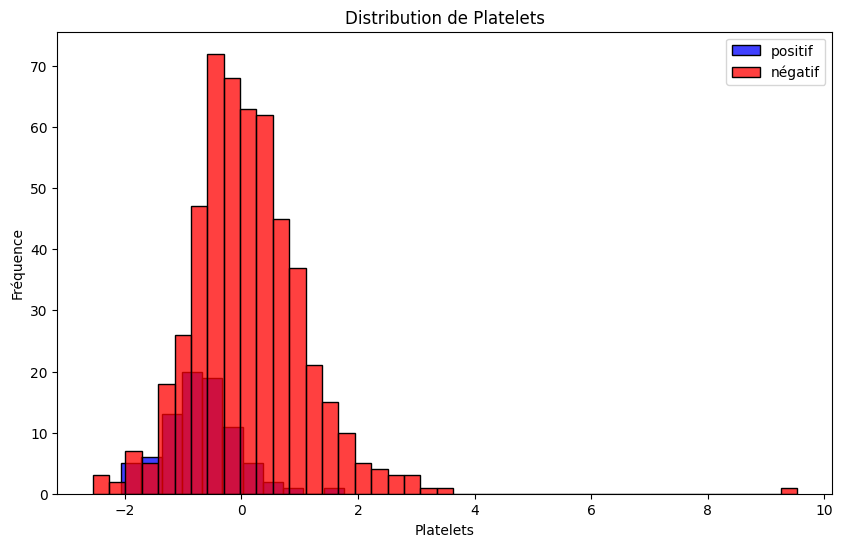

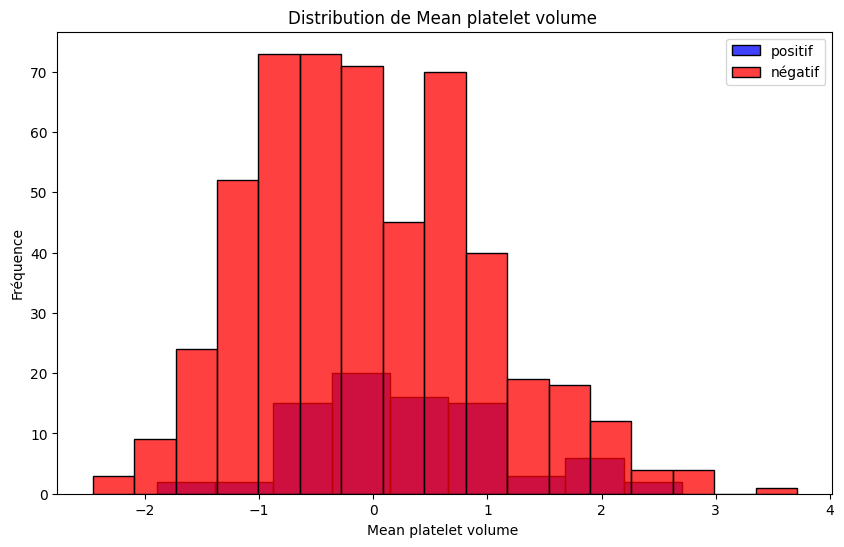

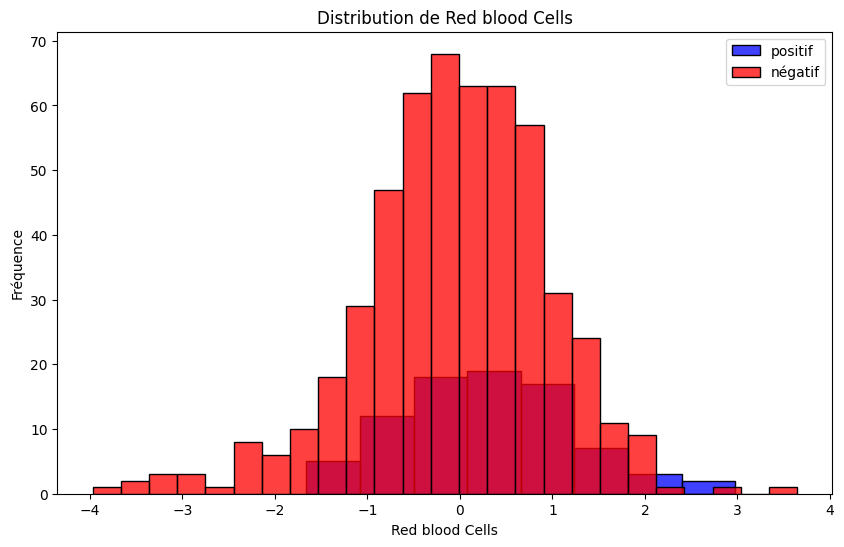

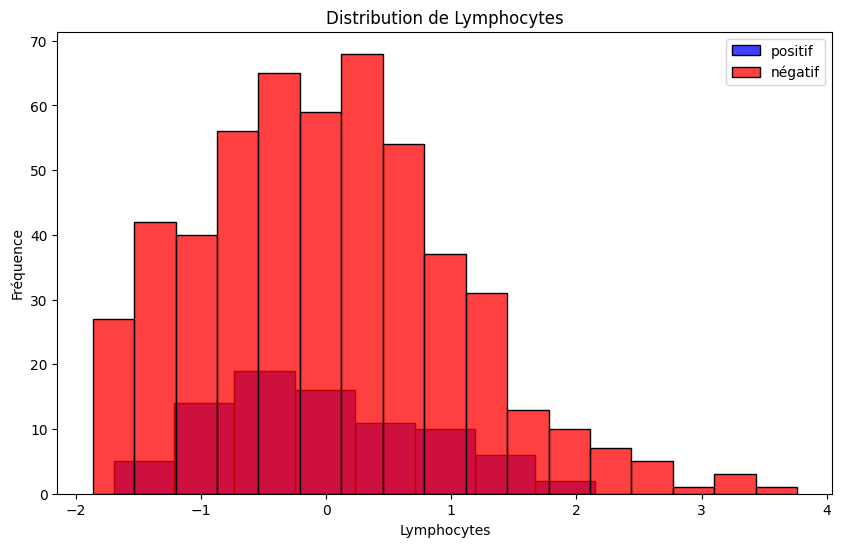

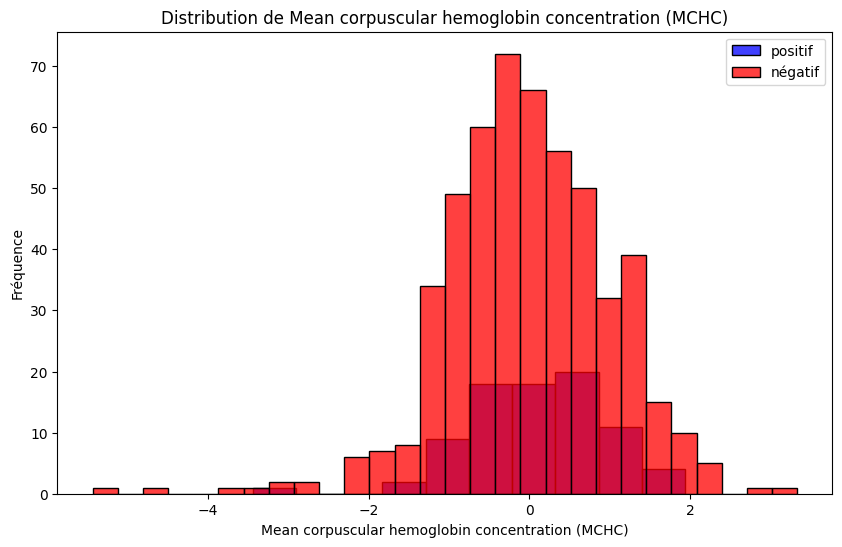

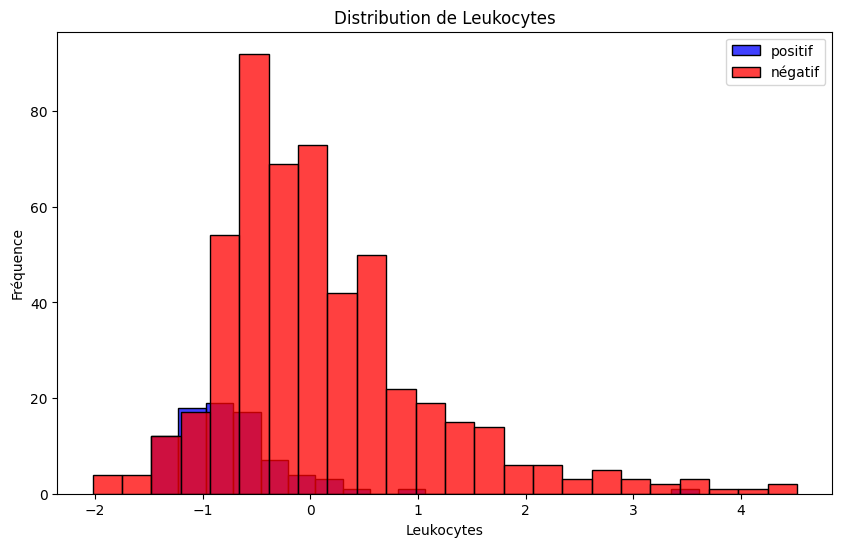

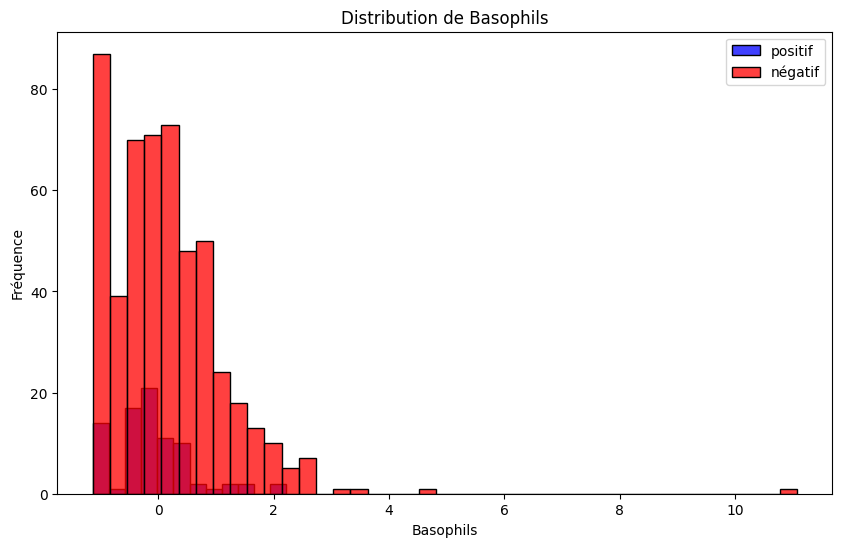

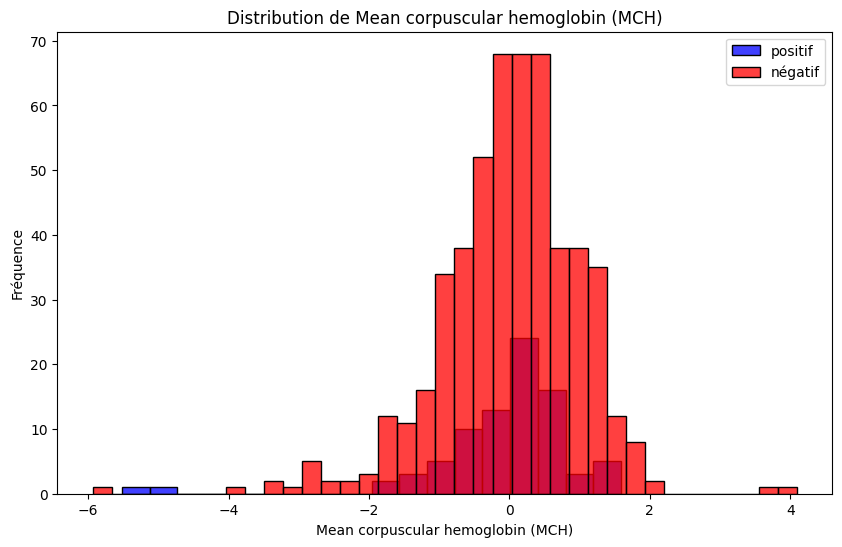

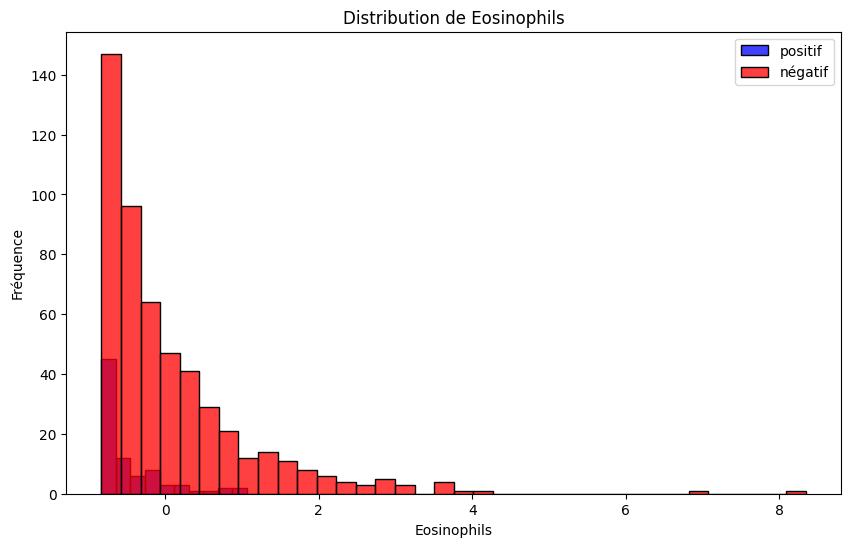

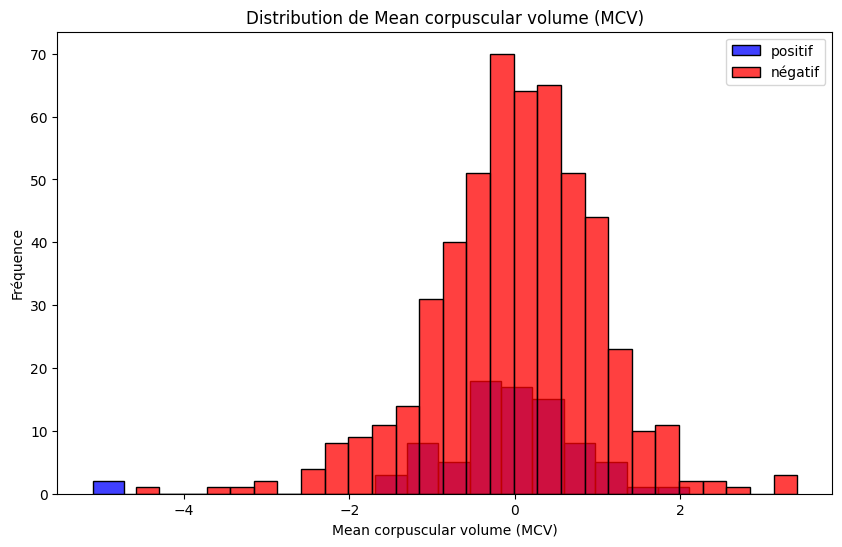

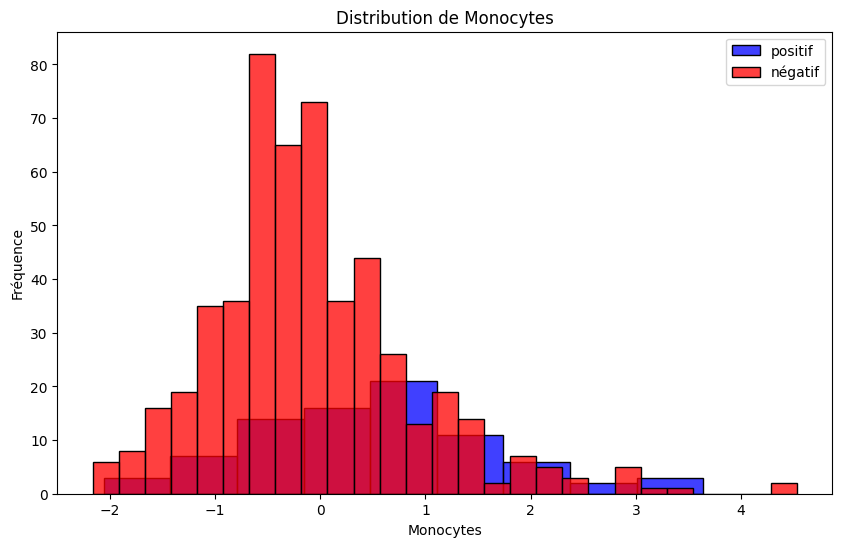

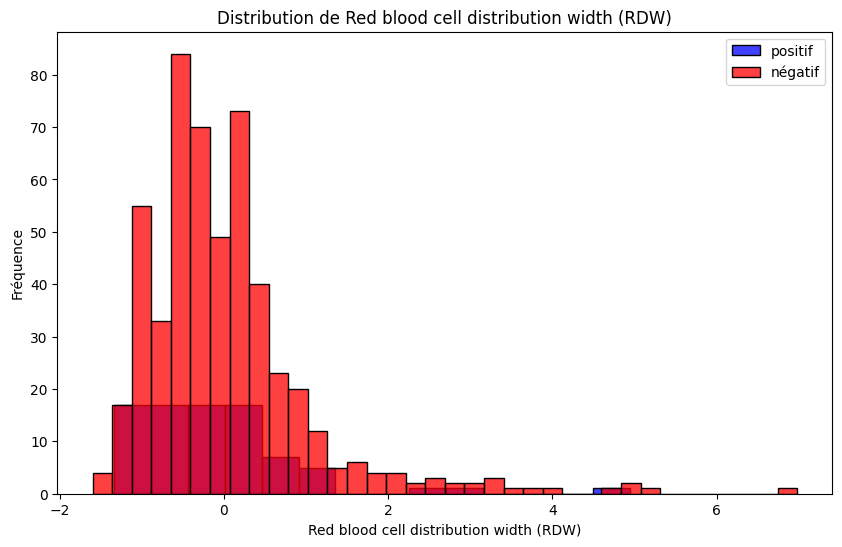

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Séparer les cas positifs et négatifs
cas_positifs = df[df['SARS-Cov-2 exam result'] == 'positive']
cas_negatifs = df[df['SARS-Cov-2 exam result'] == 'negative']

# Calculer le ratio des valeurs manquantes
valeurs_manquantes = df.isna().sum() / df.shape[0]

# Identifier les colonnes pour les tests sanguins et les tests viraux en fonction des valeurs manquantes
tests_sangin = df.columns[(valeurs_manquantes < 0.9) & (valeurs_manquantes > 0.88)]
tests_virus = df.columns[(valeurs_manquantes < 0.88) & (valeurs_manquantes > 0.75)]

# Afficher les colonnes identifiées pour vérification
print("Colonnes des tests sanguins:", tests_sangin)
print("Colonnes des tests viraux:", tests_virus)

# Tracer les distributions
for col in tests_sangin:
    plt.figure(figsize=(10, 6))  # Créer une nouvelle figure pour chaque plot
    sns.histplot(cas_positifs[col], label='positif', kde=True, color='blue')
    sns.histplot(cas_negatifs[col], label='négatif', kde=True, color='red')
    plt.legend()
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()



In [ ]:
#hypothèse: 